# Exercise 6.2
## Interpolation
In this task, we implement a simple NN to learn a complicated function.

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

### Generation of data

In [ ]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

Let's simulate the train data

In [ ]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.standard_normal(xtrain.shape)  # train data includes some noise

In [ ]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 1)


Simulate test data

In [ ]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [ ]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


### Define Model

Define the number of nodes, the number of layers, and choose an activation function.
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

You may use the skeleton below:

In [ ]:
nb_nodes = 32  # number of nodes per layer
nb_layers = 5  # number of layers
activation = "relu"  # ReLU activation function
regularization_strat = keras.regularizers.l1_l2(l1=0.01, l2=0.01)  # regularization strategy

model = keras.models.Sequential(name="1Dfit")
model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=regularization_strat ,input_dim=xtrain.shape[1]))  # first layer

for i in range(nb_layers - 1):
    model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=regularization_strat))  # hidden layers

model.add(layers.Dense(1))  # final layer

print(model.summary())

Model: "1Dfit"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model (set an objective and choose an optimizer)

Choose an optimizer from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate=0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="MSE", optimizer=adam)

### Train the model

Train the network for a couple of epochs and save the model several times in between.

In [ ]:
epochs = 400
save_period = 40  # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.weights.h5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Epoch 1/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 17.0020
Epoch 2/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6373
Epoch 3/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2304
Epoch 4/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6091
Epoch 5/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3256
Epoch 6/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8119
Epoch 7/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5585
Epoch 8/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6128
Epoch 9/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3006
Epoch 10/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2525
Epoch 11/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1460
Epoch 12/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1346
Epoch 13/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0057
Epoch 14/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9816
Epoch 15/400
157/157 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
print(results.history.keys())
print(results.history['loss'])

dict_keys(['loss'])
[12.325543403625488, 7.141140460968018, 6.007800102233887, 5.470837593078613, 5.079586982727051, 4.797863483428955, 4.60129976272583, 4.446197509765625, 4.344510078430176, 4.2528462409973145, 4.1886186599731445, 4.132413864135742, 4.081962585449219, 4.034712314605713, 4.00504207611084, 3.963109016418457, 3.9350926876068115, 3.8968520164489746, 3.8596723079681396, 3.83188796043396, 3.799455165863037, 3.7673487663269043, 3.7384512424468994, 3.7298312187194824, 3.7005343437194824, 3.687387466430664, 3.6735963821411133, 3.6598565578460693, 3.640375852584839, 3.6312174797058105, 3.6002376079559326, 3.5835916996002197, 3.5619616508483887, 3.5357909202575684, 3.5041215419769287, 3.489057779312134, 3.4598300457000732, 3.4170315265655518, 3.392328977584839, 3.35681414604187, 3.3336100578308105, 3.303544044494629, 3.2788336277008057, 3.2625811100006104, 3.248717784881592, 3.2284157276153564, 3.215662956237793, 3.207146644592285, 3.2003579139709473, 3.192927598953247, 3.177916

Compare the performance of the model during the training. You may use the skeleton below:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


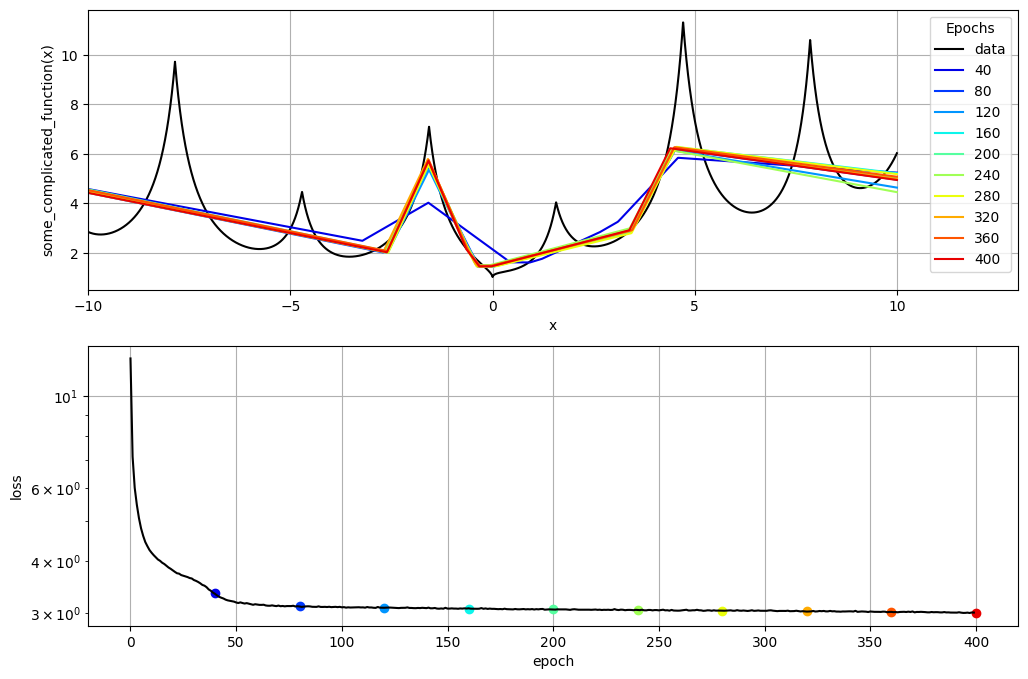

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.weights.h5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()

From the first plot we can see linear segments of the fit ment. I belive this is because of the ReLU activation function. In the second plot we see that the performance of the network is improving with an increase in number of iterations.